<a href="https://colab.research.google.com/github/ADS-505-F22-Applied-Data-Sci-for-Biz/Final_Team_Project/blob/main/Team_Project_v1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Project

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install dmba
!pip install matplotlib==3.1.3
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 8.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Import required packages
%matplotlib inline
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3

import numpy as np
import pandas as pd
# Turn off warning messages
pd.options.mode.chained_assignment = None # default = 'warn'

import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV


import missingno as mno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import scipy.special
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro

#!pip install cuml
#!pip install --pre --quiet pycaret
#from pycaret.classification import *

import warnings
warnings.filterwarnings('ignore')


# Over sampling
# !pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


#Book Authors package to gain access to datasets from book.
import dmba
from dmba import plotDecisionTree, gainsChart, liftChart, classificationSummary, regressionSummary
from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [5]:
# Get data and review shape and content.
df = pd.read_csv('https://raw.githubusercontent.com/ADS-505-F22-Applied-Data-Sci-for-Biz/Final_Team_Project/main/Bank%20Customer%20Churn%20Prediction.csv')
print(df.shape)
print(df.columns)
df

(10000, 12)
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Summary Satistics
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Check data skew
df.skew()

customer_id         0.001149
credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64

In [8]:
# Review Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
# Check for missing data
print(f'\nMissing Data:\n{df.isnull().sum()}')

print('\nTotal Missing Data:', df.isnull().sum().sum())


Missing Data:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Total Missing Data: 0


In [10]:
churned_french = df.churn[(df.country == 'France') & (df.churn == 1)].count()
count_french = df.churn[df.country == 'France'].count()
print("Percent of French People Who Churned --->", churned_french*100/count_french,'%')

churned_german = df.churn[(df.country == 'Germany') & (df.churn == 1)].count()
count_german = df.churn[(df.country == 'Germany')].count()
print("Percent of German People Who Churned --->", churned_german*100/count_german,"%")

churned_spain = df.churn[(df.country == 'Spain') & (df.churn == 1)].count()
count_spain = df.churn[(df.country == 'Spain')].count()
print("Percent of Spanish People Who Churned --->", churned_spain*100/count_spain,"%")

Percent of French People Who Churned ---> 16.15476665337056 %
Percent of German People Who Churned ---> 32.44320446392985 %
Percent of Spanish People Who Churned ---> 16.67339523617279 %


In [11]:
px.histogram(df,x='country', color = 'churn',barmode = 'group')

In [12]:
cat_vars = ['country', 'gender', 'products_number', 'credit_card', 'active_member']
num_vars = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

### Numeric EDA

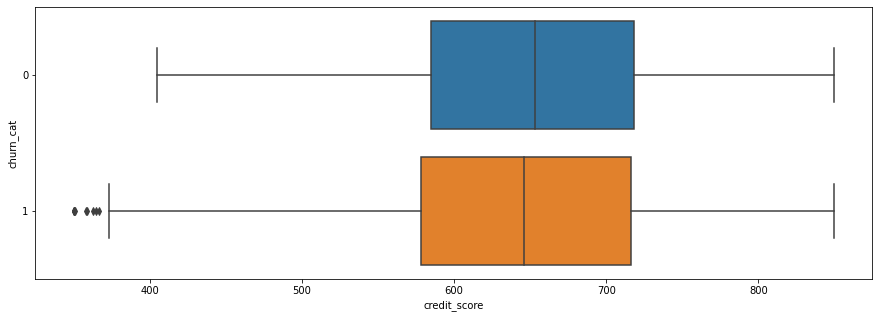

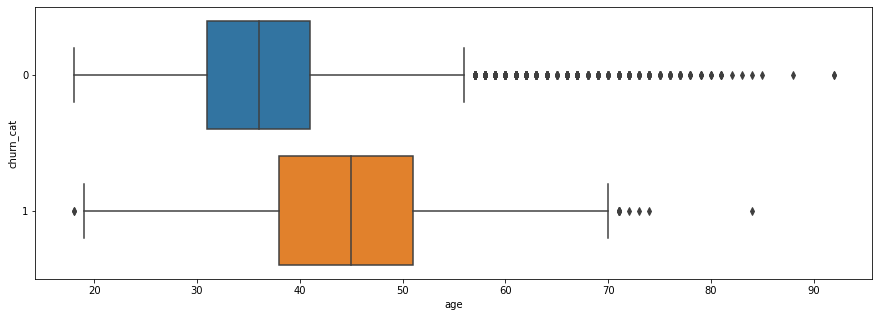

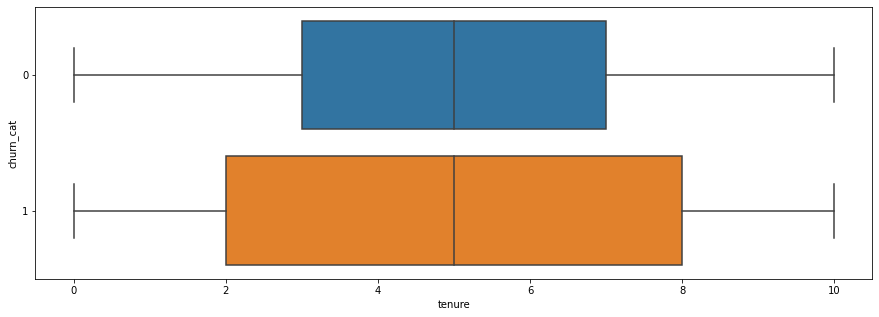

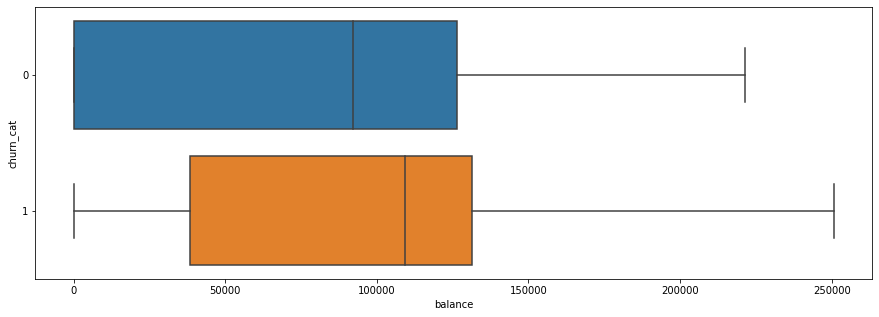

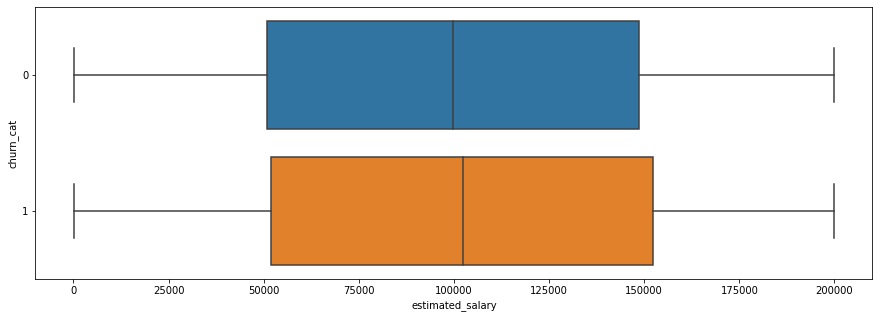

In [13]:
%matplotlib inline
temp_df = df
temp_df["churn_cat"] = temp_df["churn"].astype("category")

for col in num_vars:
  plt.figure(figsize=(15,5))
  ax = sns.boxplot(data = temp_df, x = col, y = 'churn_cat')
  plt.show()

### Categorical EDA

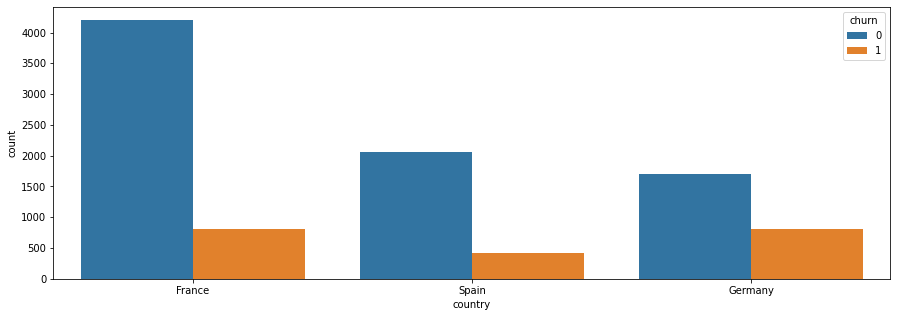

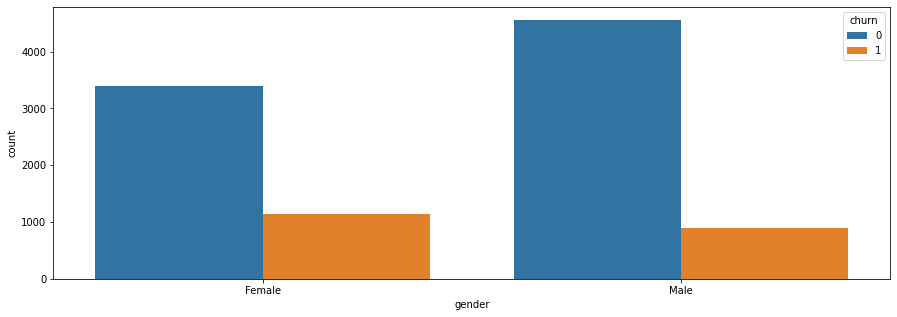

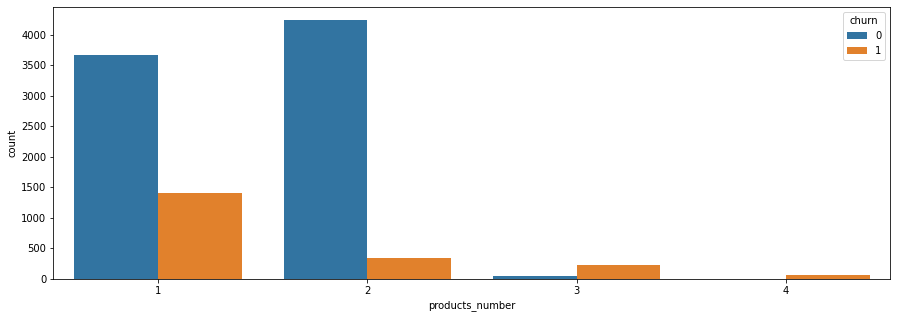

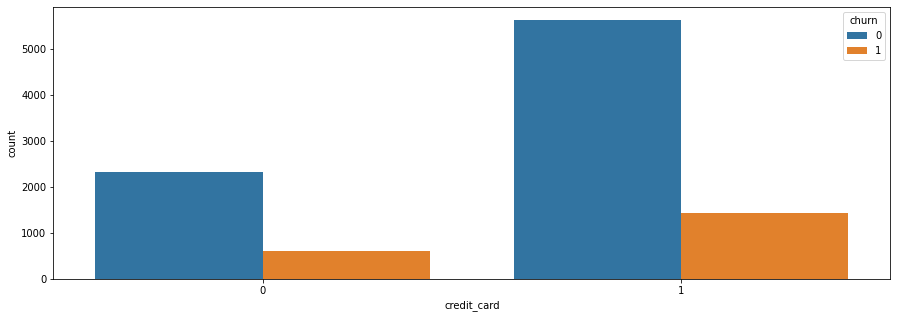

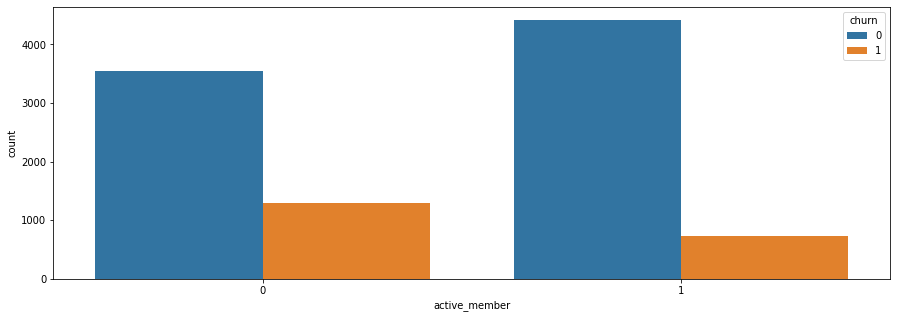

In [14]:
# Plot Category Data by Churn
for col in cat_vars:
  plt.figure(figsize=(15,5)) 
  ax = sns.countplot(data = df, x = col, hue = 'churn')
  plt.show()

In [15]:
print('******************')
print('Churn Balance:')
print('******************')
print(df.churn.value_counts(dropna=False, normalize = True))
print('\n')
for col in cat_vars:
  print('******************')
  print('{} split:'.format(col))
  print('******************')
  p1 = df[(df.churn == 1)].groupby(col).size().reset_index(name='yes_counts')
  p2 = df.groupby(col).size().reset_index(name='total_counts')
  p1['total_count'] = p2['total_counts']
  p1['percent_yes'] = p1['yes_counts']/p2['total_counts']
  print(p1)
  print('\n')

******************
Churn Balance:
******************
0    0.7963
1    0.2037
Name: churn, dtype: float64


******************
country split:
******************
   country  yes_counts  total_count  percent_yes
0   France         810         5014     0.161548
1  Germany         814         2509     0.324432
2    Spain         413         2477     0.166734


******************
gender split:
******************
   gender  yes_counts  total_count  percent_yes
0  Female        1139         4543     0.250715
1    Male         898         5457     0.164559


******************
products_number split:
******************
   products_number  yes_counts  total_count  percent_yes
0                1        1409         5084     0.277144
1                2         348         4590     0.075817
2                3         220          266     0.827068
3                4          60           60     1.000000


******************
credit_card split:
******************
   credit_card  yes_counts  total_count

## Bivariate EDA


In [16]:
# Look At Averages by Churn status
features = df.keys()
features = features.drop('churn')
subsets = ['credit_score']
df.groupby('churn')[features].mean().style.background_gradient(cmap = "ocean")

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691167.881703,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,15690051.964654,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [17]:
fig = px.histogram(df, x="age", y="balance", color="churn",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

### Correlation Analysis

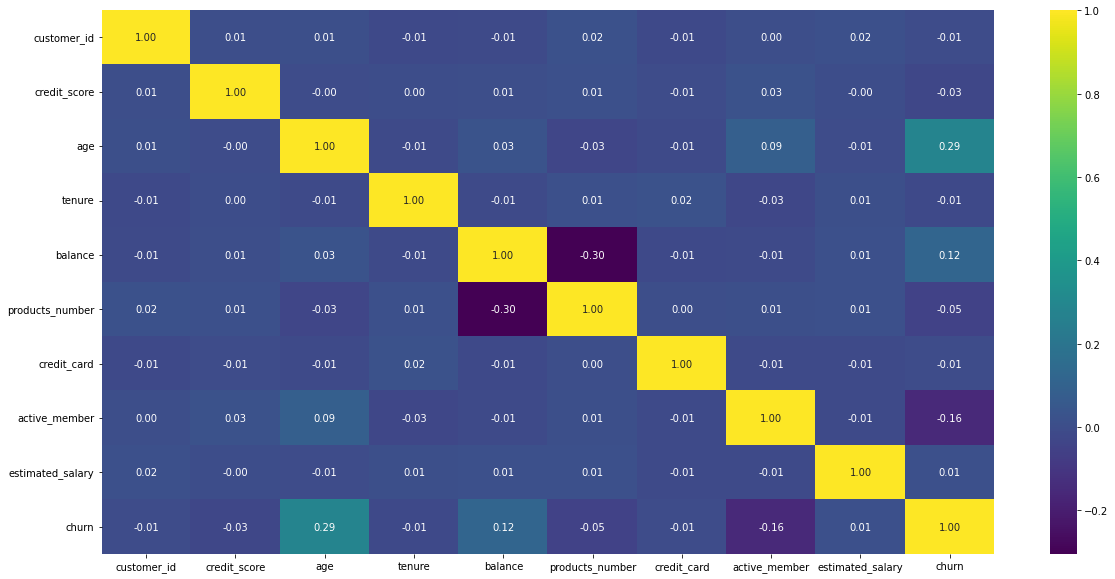

In [18]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "viridis");

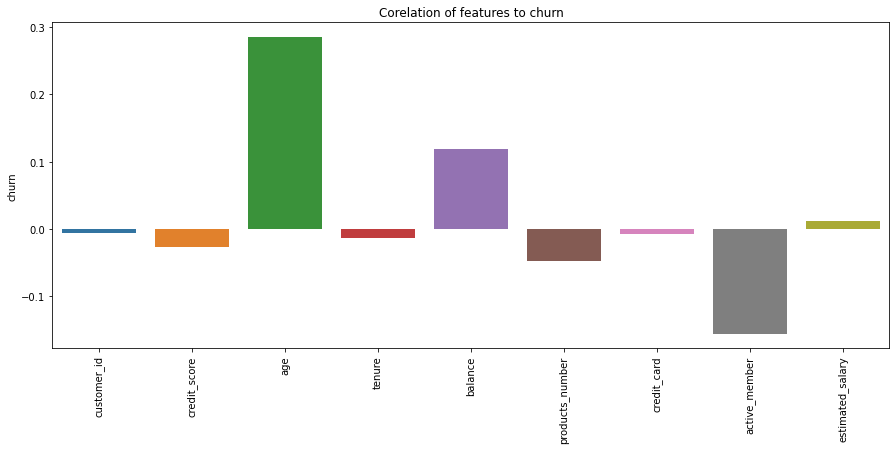

In [19]:
corr = df.corr().churn
plt.figure(figsize = (15,6))
sns.barplot(x = corr[:-1].index, y = corr[:-1])
plt.title("Corelation of features to churn")
plt.xticks(rotation=90);

### Pairplots

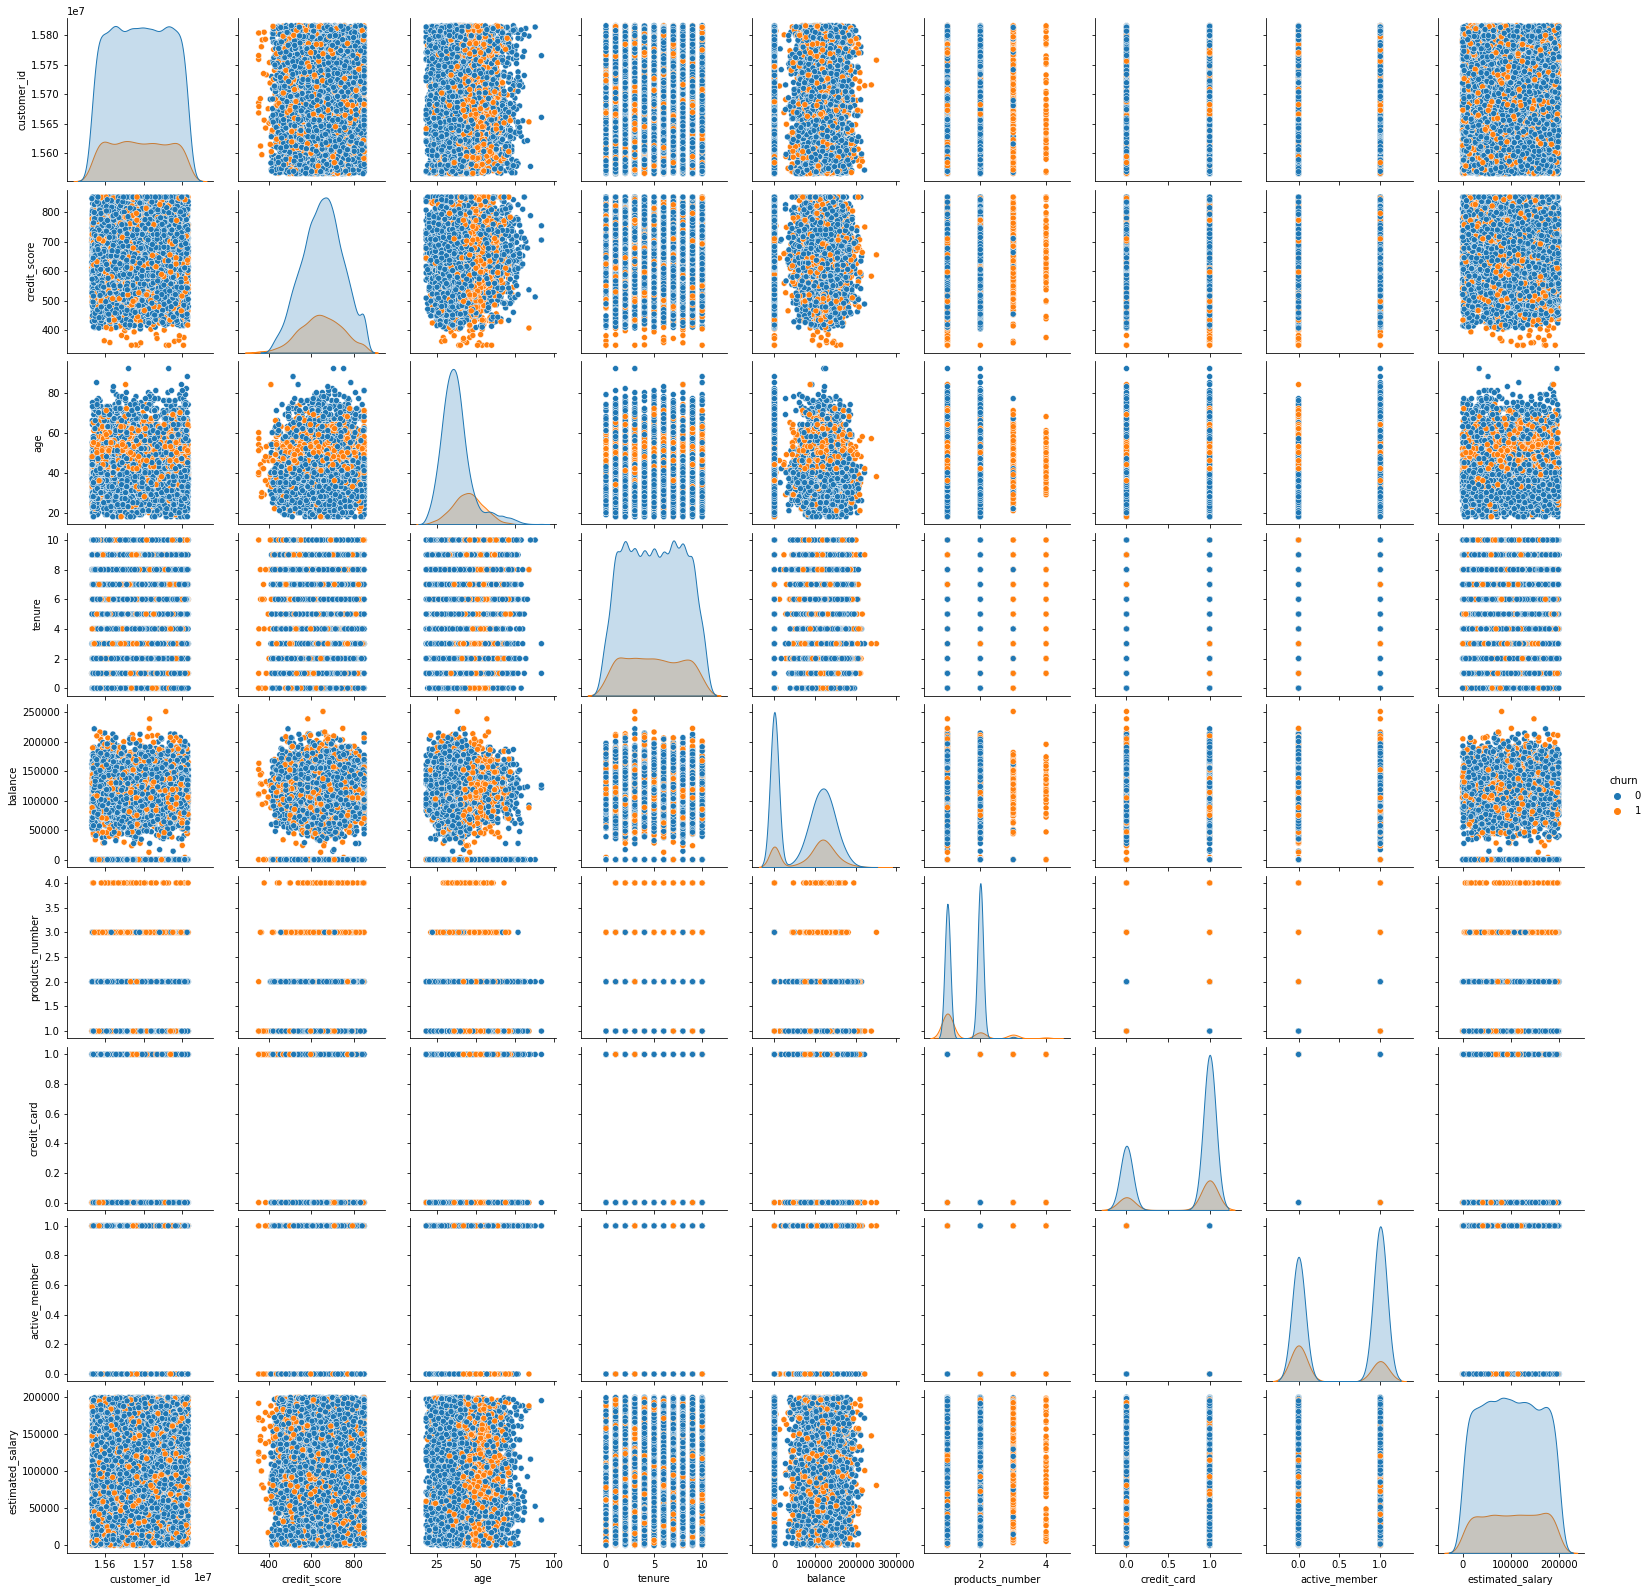

In [20]:
%matplotlib inline
sns.pairplot(df, hue = 'churn')

Gradient Boosting Classifier

In [21]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,churn_cat
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [22]:
# Create Instrumental / Dummy Variables
# Function to Adjust DTypes to category types
def cat_types(df, columnName):
  df[columnName] = df[columnName].astype("category")
  return columnName

# List to Apply Function to.
dummy_predictors = ['country',	'gender', 'products_number']

# List Comphension:
[cat_types(df, i) for i in dummy_predictors]

# Clean and create new dataframe:
temp = pd.get_dummies(df[dummy_predictors], drop_first=True)
new_df = pd.concat([df, temp], axis=1, join="inner")
new_df = new_df.drop(['churn_cat','customer_id'] + dummy_predictors, axis=1)
print(new_df.columns)
print(new_df.shape)

Index(['credit_score', 'age', 'tenure', 'balance', 'credit_card',
       'active_member', 'estimated_salary', 'churn', 'country_Germany',
       'country_Spain', 'gender_Male', 'products_number_2',
       'products_number_3', 'products_number_4'],
      dtype='object')
(10000, 14)


In [23]:
# separate target and predictors
dependant_vars = ['credit_score', 'age', 'tenure', 'balance', 'credit_card', 'active_member', 
                  'estimated_salary', 'country_Germany', 'country_Spain', 'gender_Male', 
                  'products_number_2', 'products_number_3', 'products_number_4']
 
 

y = new_df['churn'].to_numpy()
X = new_df[dependant_vars]

# Standardize the dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

StandardScaler()

In [24]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)


# Normalize the data
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the over sampling transform
X_train_norm_os, y_train_os = oversample.fit_resample(X_train_norm, y_train)

In [25]:
# Helper Functions:
def confusionMatrices(model, title):
  print('\n'+'-'*20)
  print(title + ' - training results\n')
  classificationSummary(y_train_os, model.predict(X_train_norm_os))
  print('\n'+'-'*20)
  print(title + ' - validation results\n')
  valid_pred = model.predict(X_test_norm)
  classificationSummary(y_test, valid_pred)

def pred_results(model):
  model_proba = model.predict_proba(X_test_norm)
  pred_results = pd.DataFrame({'actual': y_test.astype("int64"), 
                            'p(0)': [p[0] for p in model_proba],
                            'p(1)': [p[1] for p in model_proba],
                            'predicted': model.predict(X_test_norm)
                          })
  pred_results = pred_results.sort_values(by=['p(1)'], ascending=False)
  return pred_results


In [26]:
# # If I want to do hyperparameter Tuneing.
# param_test2 = {'max_depth':range(5,16,2), 
#                'min_samples_split':range(200,1001,200), 
#                'learning_rate': [10e-2, 10e-3, 10e-4, 10e-5, 10e-6], 
#                'n_estimators':range(50,200,50),
#                'criterion': ['friedman_mse', 'squared_error', 'mse'],
#                'loss': ['log_loss', 'deviance', 'exponential']}
# gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5) # iid=False,
# gsearch2.fit(X_train_norm_os, y_train_os)

# gsearch2.best_estimator_, gsearch2.best_params_, gsearch2.best_score_, gsearch2.scorer_

In [33]:
# GBM Model
gbm = GradientBoostingClassifier()
gbm.fit(X_train_norm_os, y_train_os)
confusionMatrices(gbm, 'Gradient Boosting Classifier')
gbm_result = pred_results(gbm)
print('\nAIC', AIC_score(y_test, gbm.predict(X_test_norm), df=len(X.columns) + 1), '\n')


--------------------
Gradient Boosting Classifier - training results

Confusion Matrix (Accuracy 0.8084)

       Prediction
Actual    0    1
     0 3973  831
     1 1010 3794

--------------------
Gradient Boosting Classifier - validation results

Confusion Matrix (Accuracy 0.7980)

       Prediction
Actual    0    1
     0 2559  600
     1  208  633

AIC 4983.557939313653 



In [28]:
# Random Forest

In [29]:
# K-Nearest Neighbors

In [34]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(X_train_norm_os, y_train_os)
lda_result = pred_results(lda_reg)
confusionMatrices (lda_reg, 'LDA')


--------------------
LDA - training results

Confusion Matrix (Accuracy 0.7596)

       Prediction
Actual    0    1
     0 3682 1122
     1 1188 3616

--------------------
LDA - validation results

Confusion Matrix (Accuracy 0.7625)

       Prediction
Actual    0    1
     0 2429  730
     1  220  621


In [35]:
# Logistic Regression
logit_reg = LogisticRegression (penalty="l2" , C=1e42, solver='liblinear' )
logit_reg.fit(X_train_norm_os, y_train_os)
lr_result = pred_results(logit_reg)
confusionMatrices (logit_reg, 'Logistic regression')


--------------------
Logistic regression - training results

Confusion Matrix (Accuracy 0.7600)

       Prediction
Actual    0    1
     0 3702 1102
     1 1204 3600

--------------------
Logistic regression - validation results

Confusion Matrix (Accuracy 0.7622)

       Prediction
Actual    0    1
     0 2433  726
     1  225  616


In [36]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_norm_os, y_train_os)
nb_result = pred_results(naive_bayes)
confusionMatrices (naive_bayes, 'Naive Bayes')

# Possible overfitting to the validation set here? May not be doing this model correctly, fine by me to remove.


--------------------
Naive Bayes - training results

Confusion Matrix (Accuracy 0.5658)

       Prediction
Actual    0    1
     0 4781   23
     1 4149  655

--------------------
Naive Bayes - validation results

Confusion Matrix (Accuracy 0.8125)

       Prediction
Actual    0    1
     0 3136   23
     1  727  114


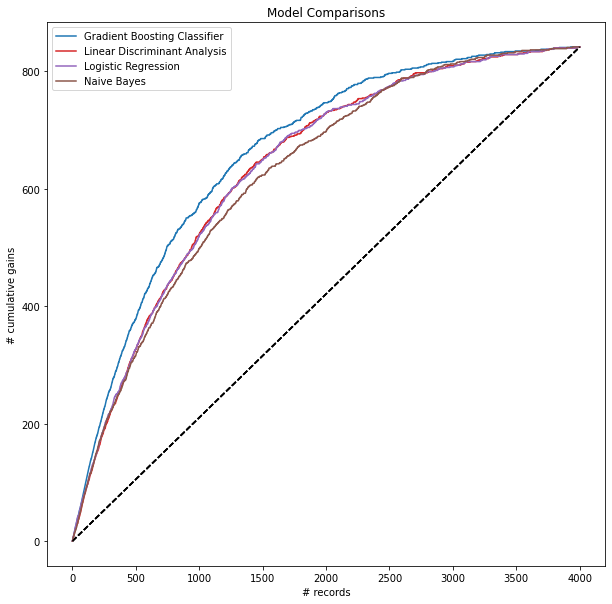

In [37]:
# Plot Gains Chart for All Models
ax = gainsChart(gbm_result.actual, label='Gradient Boosting Classifier', color='C0', figsize=[10, 10])
#ax = gainsChart(rf_result.actual, label='Random Forest', color='C1', ax=ax)
#ax = gainsChart(knn_tree_result.actual, label='K-Nearest Neighbors', color='C2', ax=ax)
ax = gainsChart(lda_result.actual, label='Linear Discriminant Analysis', color='C3', ax=ax)
ax = gainsChart(lr_result.actual, label='Logistic Regression', color='C4', ax=ax)
ax = gainsChart(nb_result.actual, label='Naive Bayes', color='C5', ax=ax)
ax.legend()
ax.set_title('Model Comparisons')

plt.show()